## Simple linear regression

Implemented by: Muhammad Umair

Date: 11/5/2020

This project involves implementing a simple linear regression model from scratch using tensorflow. The aim of the project is to demonstrate low-level understanding of the linear model and ability to program the underlying logic. 

### Linear regression background 

Linear regression is a supervised machine learning technique where the predicted outcome is continuous and has a constant slope. It is used to predict values within a continuous range rather than trying to classify them into categories. 

There are several components to linear regression:

#### Prediction function

The prediction function is the linear regression function that the model trys to fit on the training data. It consists of a weight matrix and a bias vector that are learned using the training data.

#### Cost function

This is the function that is used to measure the accuracy of the model per training example. The function provides a measure of how good the prediction is and has the property of being differentiable. In other words, it provides a score associated with the current values of the weights and bias. 

There are many different cost functions including Mean Square Error, which is used in this project. 

#### Optimizer 

The optimizer is the technique used to determine the gradient of the cost function. The goal of the optimizer is to find a local minima in the gradient space of the cost function per training bacth and update the weight and bias matrices such that the value of the gradient is reduced. 

This project uses the Stochastic Gradient Descent (SGD) algorithm as the optimizer. Stochasitc gradient descent, instead of calculating the gradient per training example, estimates the gradient for a very small batch of training examples and updates the weights and biases appropriately. The estimated gradient is assumed to give, on average, the same performance as the gradient per example. 



In [1]:
# Setup 

import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%load_ext tensorboard

In [2]:
# Generating data that can be fit using a linear model
N = 100 # Numer of data points 
x_np = np.random.random_sample([N,1]).astype(np.float32)
y_np = (np.squeeze(x_np.dot([[0.3]])) + 1.0 + 0.1 * np.random.random_sample([N])).astype(np.float32)


Text(0, 0.5, 'y')

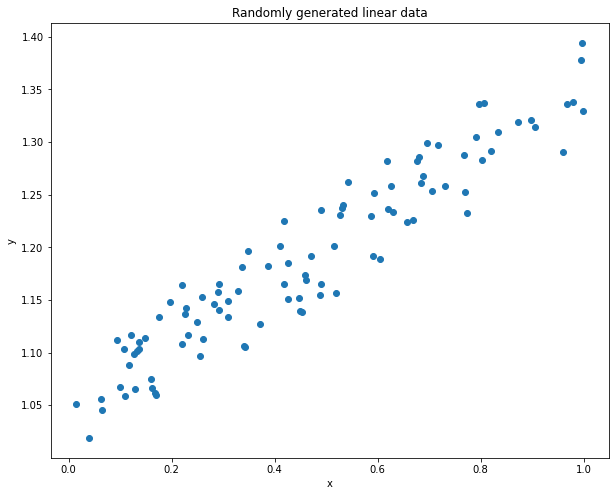

In [3]:
# Plotting the original data 
plt.plot(np.squeeze(x_np),y_np,'o')
plt.title("Randomly generated linear data")
plt.xlabel('x')
plt.ylabel('y')

In [15]:
# Loading the linear model
from linear_model import LinearRegression

In [25]:
# Hyperparameters for the model
initializer = 'zeros'
lamb = tf.constant(1.0,dtype=tf.float32)
learning_rate = 0.001
epochs = 1000
optimizer = "SGD"
loss = "SSE"

In [26]:
# Setting up the model
linear_model = LinearRegression(initializer)

In [27]:
# Training the model with the training set

x_tf = tf.convert_to_tensor(x_np,dtype=tf.float32)
y_tf = tf.convert_to_tensor(y_np,dtype=tf.float32)

w, b = linear_model.train(x_tf,y_tf,lamb,learning_rate,epochs,optimizer,
                          loss)


[0.2684659] 1.065625


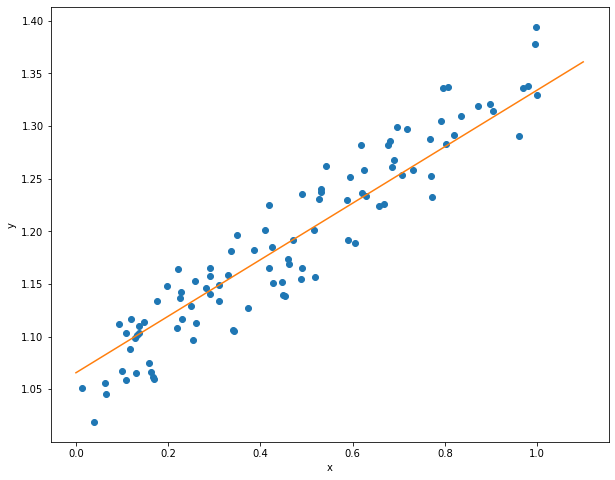

In [28]:
# Plotting the result of the weight and bias values 

w_np = w.numpy()
b_np = b.numpy()

print(w_np,b_np)

x_line = np.arange(12) / 10.0
y_line = x_line * np.squeeze(w_np) + b_np

plt.plot(x_np, y_np, 'o')
plt.plot(x_line, y_line)
plt.ylabel('y')
plt.xlabel('x')
plt.show()
